Air pollution: https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set/data

https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

In [162]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


No: row number \
year: year of data in this row \
month: month of data in this row \
day: day of data in this row \
hour: hour of data in this row \
PM2.5: PM2.5 concentration (ug/m^3) \
PM10: PM10 concentration (ug/m^3) \
SO2: SO2 concentration (ug/m^3) \
NO2: NO2 concentration (ug/m^3) \
CO: CO concentration (ug/m^3) \
O3: O3 concentration (ug/m^3) \
TEMP: temperature (degree Celsius) \
PRES: pressure (hPa) \
DEWP: dew point temperature (degree Celsius) \
RAIN: precipitation (mm) \
wd: wind direction \
WSPM: wind speed (m/s) \
station: name of the air-quality monitoring site 

In [163]:
location_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
for name in location_names:
    df = pd.read_csv(f'air_quality/{name}.csv')
    df.head()
    columns_to_drop = ['No', 'wd', 'station', 'year', 'month', 'day', 'hour', 'PM10']
    df['station'].unique()

    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    df.replace([np.inf, -np.inf, 'NA'], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    df.sort_values(by=['date'], inplace=True)
    df.dropna(subset=['PM2.5'], inplace=True)
    df['SO2'] = df['SO2'].interpolate(method='linear')
    df['NO2'] = df['NO2'].interpolate(method='linear')
    df['CO'] = df['CO'].interpolate(method='linear')
    df['O3'] = df['O3'].interpolate(method='linear')
    df['TEMP'] = df['TEMP'].interpolate(method='linear')
    df['PRES'] = df['PRES'].interpolate(method='linear')
    df['DEWP'] = df['DEWP'].interpolate(method='linear')
    df['RAIN'] = df['RAIN'].interpolate(method='linear')
    df['WSPM'] = df['WSPM'].interpolate(method='linear')

    X = df.drop(columns=['PM2.5'], axis=1).values
    y = df['PM2.5'].values

    X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.20, shuffle=False
            )
    train_df = pd.DataFrame(X_train)
    test_df = pd.DataFrame(X_test)

    train_df['PM2.5'] = y_train
    test_df['PM2.5'] = y_test

    print(train_df.isnull().sum())
    print(test_df.isnull().sum())

    train_df.to_csv(f'air_quality/train_client_{name}.csv', index=False)
    test_df.to_csv(f'air_quality/test_client_{name}.csv', index=False)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
PM2.5    0
dtype: int64
0        0
1        0
2        0
3        0
4        0
5      

In [164]:
df.head()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0,2013-03-01 00:00:00
1,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,4.4,2013-03-01 01:00:00
2,8.0,0.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,4.7,2013-03-01 02:00:00
3,8.0,3.0,16.0,0.0,0.0,-0.7,1023.5,-20.9,0.0,2.6,2013-03-01 03:00:00
4,8.0,3.0,0.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,2.5,2013-03-01 04:00:00


In [165]:
df.shape

(35064, 11)

In [166]:
def plot_all_targets(dataset1, dataset2, dataset3, dataset4, dataset5, dataset_name):
    feature = 'PM2.5'  # Single feature to plot

    plt.figure(figsize=(6, 3))  # Set figure size

    # Plot the same feature from all three datasets
    plt.plot(dataset1[feature], label='part 1', linewidth=2)
    plt.plot(dataset2[feature], label='part 2', linewidth=2)
    plt.plot(dataset3[feature], label='part 3', linewidth=2)
    plt.plot(dataset4[feature], label='part 4', linewidth=2)
    plt.plot(dataset5[feature], label='part 5', linewidth=2)

    # Increase font size for title, legend, and labels
    plt.title(f'{dataset_name}', fontsize=16)
    plt.xlabel('Instances', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=12, frameon=False)
    ax = plt.gca()  # Get the current axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.grid(False)  # Add grid for better visualization
    plt.show()

def plot_all_clients_side_by_side(datasets, dataset_names):
    """
    Plots multiple clients' data side by side in one figure.
    
    Args:
    - datasets: List of lists, where each inner list contains 4 partitions for a dataset.
    - dataset_names: List of dataset names corresponding to the clients.
    """
    feature = 'PM2.5'
    colors = ['blue', 'orange', 'green', 'red']
    num_clients = len(datasets)

    fig, axes = plt.subplots(nrows=1, ncols=num_clients, figsize=(18, 4), sharey=True)

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        for j in range(4):  # Loop over 4 partitions
            axes[i].plot(dataset[j][feature], color=colors[j], label=f'part {j+1}', linewidth=2)
        
        axes[i].set_title(name, fontsize=16)
        axes[i].set_xlabel("Instances", fontsize=12)
        if i == 0:
            axes[i].set_ylabel(feature, fontsize=14)  # Set y-label only for the first plot
        axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=12, frameon=False)
        
        # Remove top and right borders
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


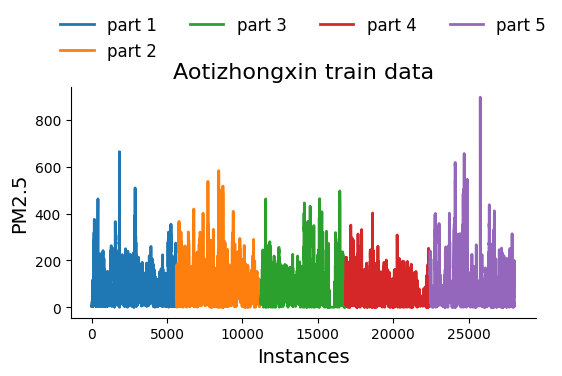

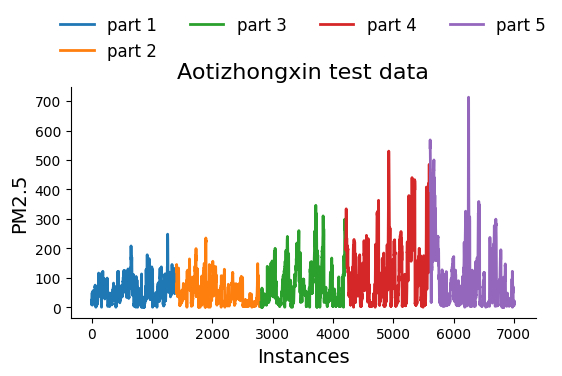

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


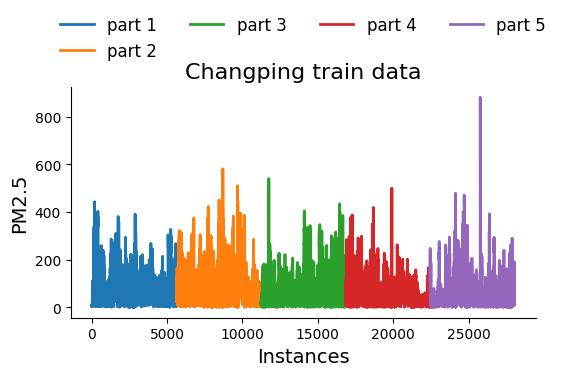

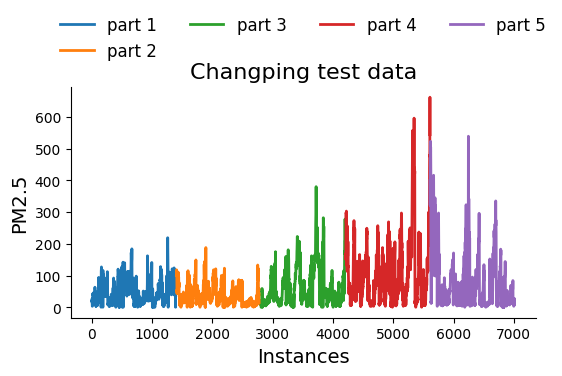

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


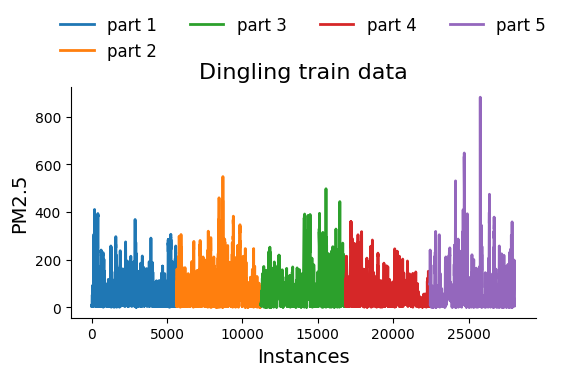

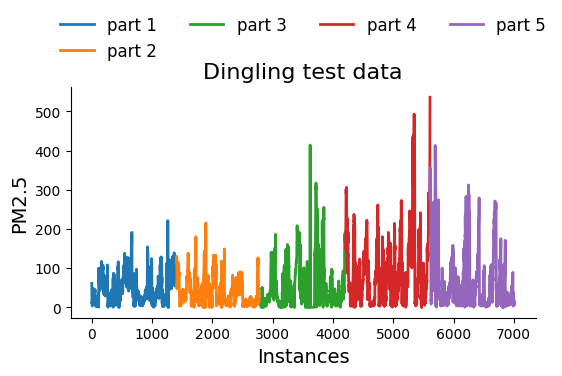

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


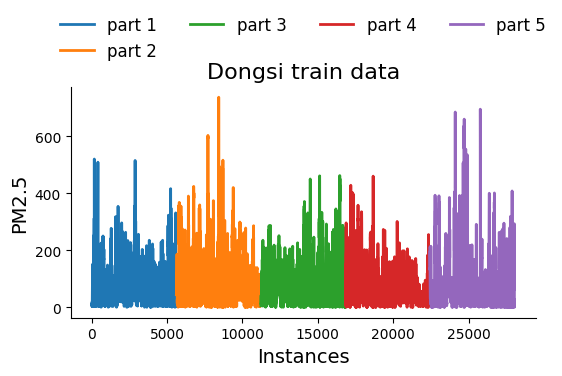

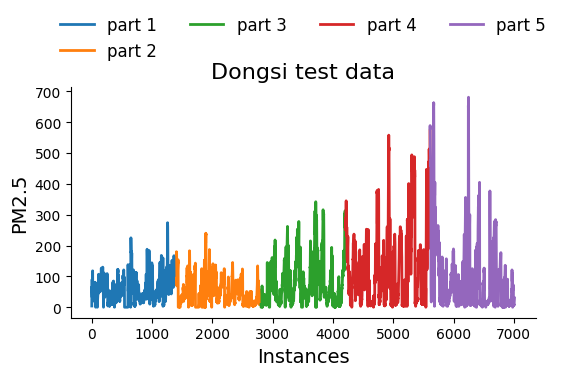

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


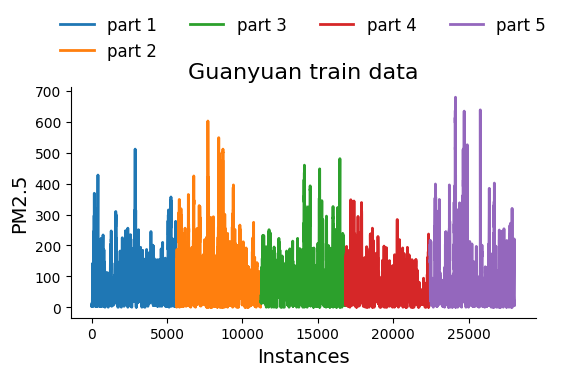

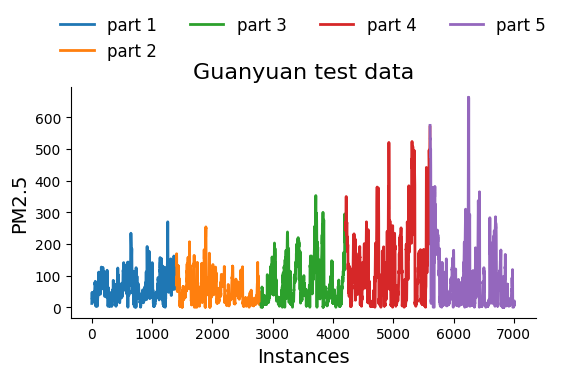

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


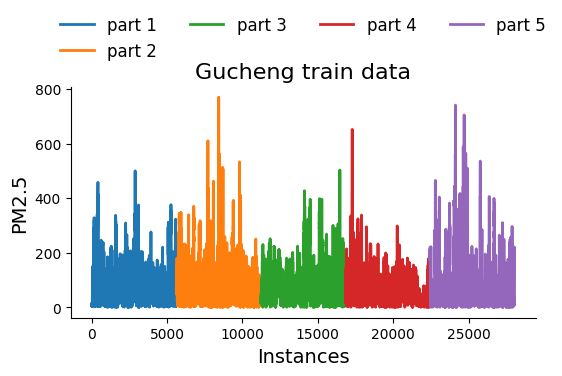

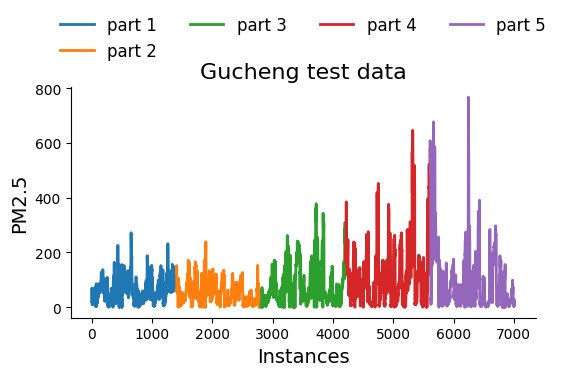

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


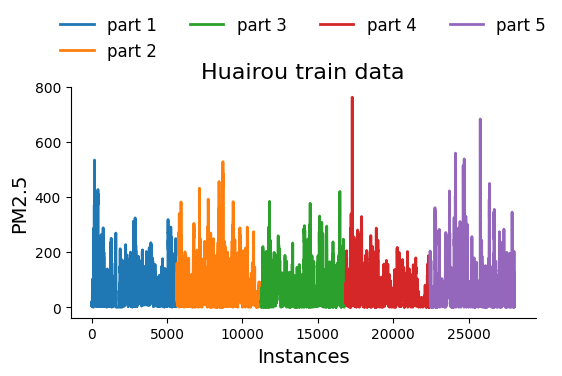

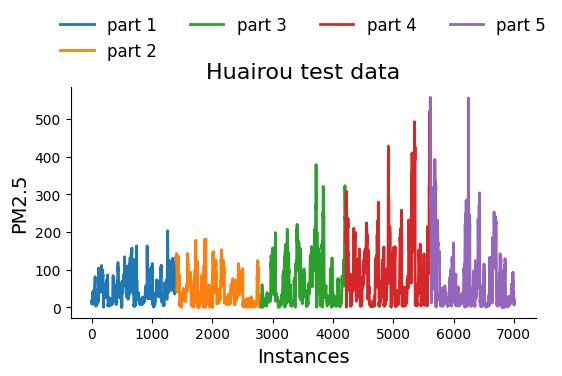

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


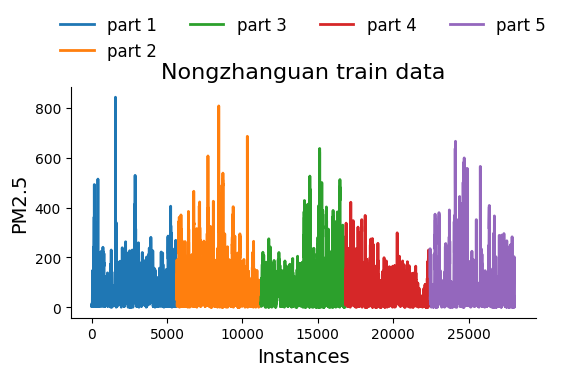

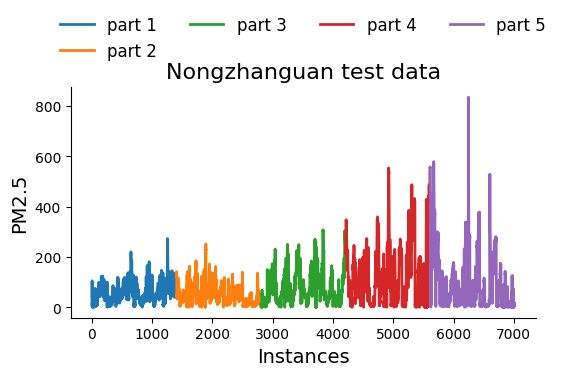

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


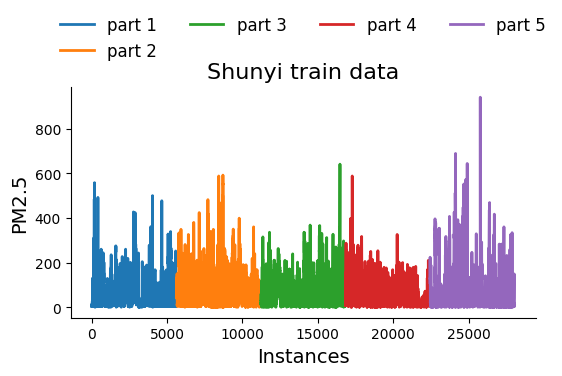

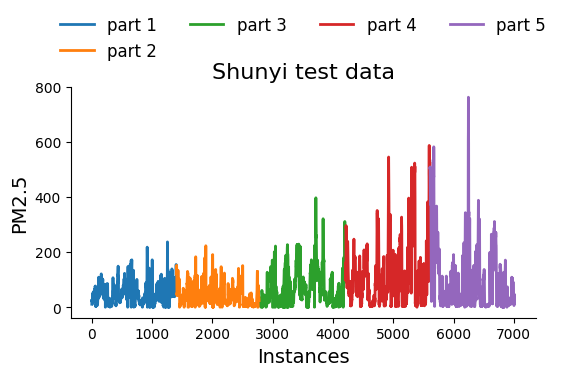

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


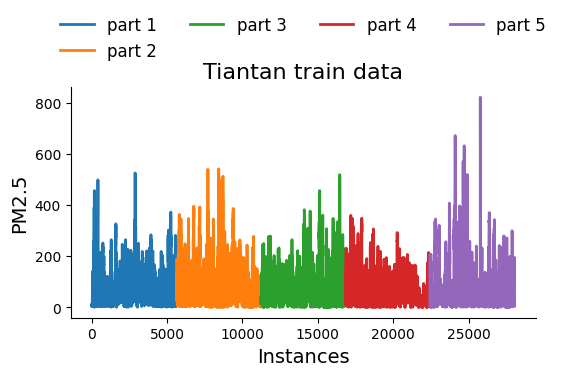

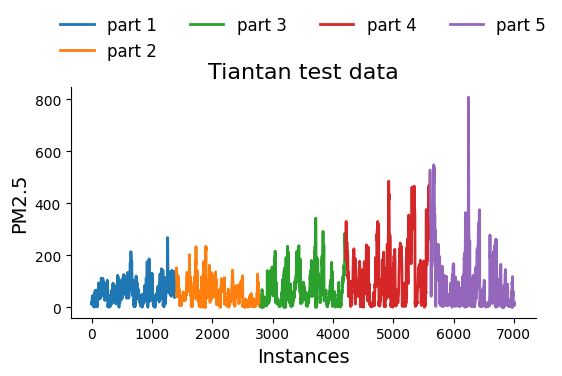

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


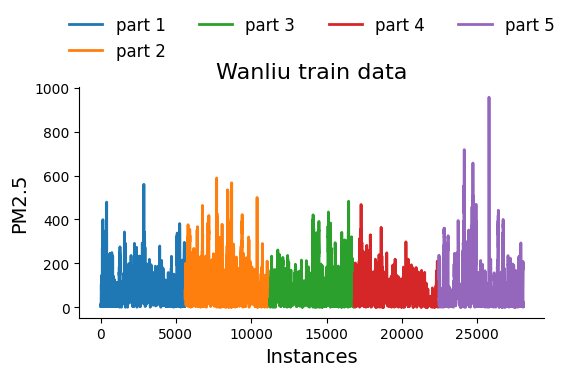

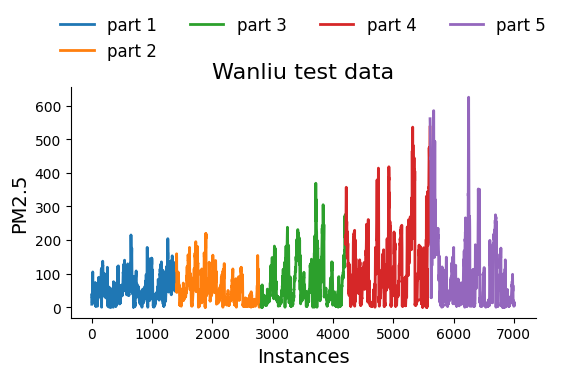

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


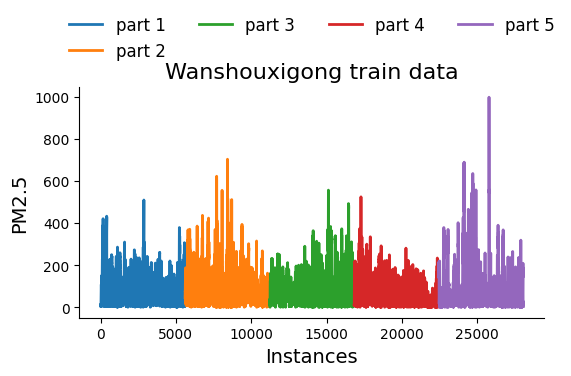

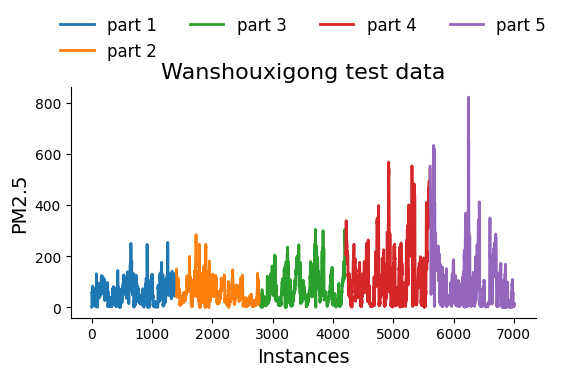

In [167]:
for name in location_names:

    train_df = pd.read_csv(f'air_quality/train_client_{name}.csv')
    test_df = pd.read_csv(f'air_quality/test_client_{name}.csv')
    
    client_train_list = np.array_split(train_df, 5)
    client_test_list = np.array_split(test_df, 5)

    plot_all_targets(client_train_list[0], client_train_list[1], client_train_list[2], client_train_list[3], client_train_list[4],  dataset_name=f'{name} train data')
    plot_all_targets(client_test_list[0], client_test_list[1], client_test_list[2], client_test_list[3], client_test_list[4], dataset_name=f'{name} test data')